# Function arities of different Scala projects

I was curious what is a distribution of function arities in different Scala projects.
Scala is a functional programming language, so I assumed the average number of arguments would be more than 2.

So I did a small research. I created a Scala compiler plugin that gathered defined functions arities.
In this notebook I visualize collected data for the following projects:
- Scala 2.12.4 compiler and standard library
- Dotty 0.5.0-RC1 compiler
- Akka 2.4
- Spark 2.2
- Cats 1.0
- Scalaz 7.2.9

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  
import numpy as np

Scala doesn't have static functions, hence every function implicitly receives `this` argument.
That's why I add 1 to every function arity except `<init>`

In [2]:
def readStats(filename):
    x = []
    with open(filename, "r") as file:    
        for l in file:
            name, num = l.strip().split()
            n = int(num)
            n = n if name == "<init>" else n + 1
            x.append(n)
    return np.asarray(x)

In [8]:
scalaz = readStats("data/scalaz7.2.9.txt")
akka   = readStats("data/akka2.4.txt")
scala  = readStats("data/scala2.12.txt")
dotty  = readStats("data/dotty.txt")
spark  = readStats("data/spark2.2.txt")
cats   = readStats("data/cats1.0.txt")

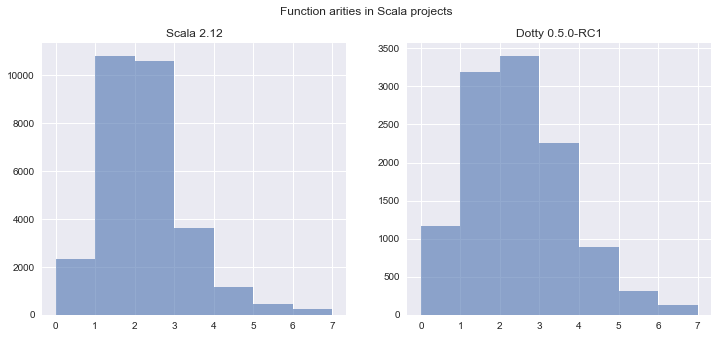

In [4]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(12, 5))
fig.suptitle("Function arities in Scala projects")
plt.subplot(121)
plt.title("Scala 2.12")
n, bins, patches = plt.hist(scala, bins=range(8),  alpha=0.6, histtype='bar')
plt.subplot(122)
plt.title("Dotty 0.5.0-RC1")
n, bins, patches = plt.hist(dotty, bins=range(8),  alpha=0.6, histtype='bar')


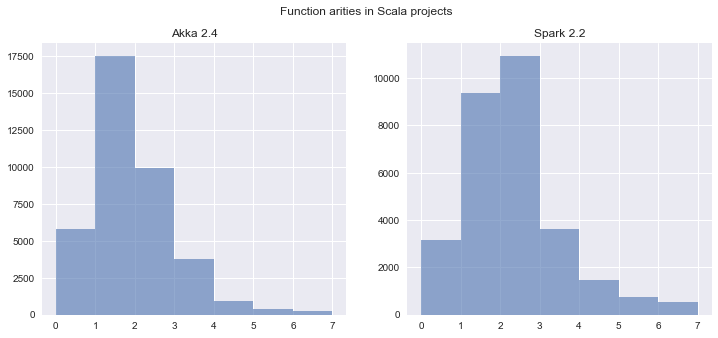

In [5]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle("Function arities in Scala projects")
plt.subplot(121)
plt.title("Akka 2.4")
n, bins, patches = plt.hist(akka, bins=range(8),  alpha=0.6, histtype='bar')
plt.subplot(122)
plt.title("Spark 2.2")
n, bins, patches = plt.hist(spark, bins=range(8),  alpha=0.6, histtype='bar')

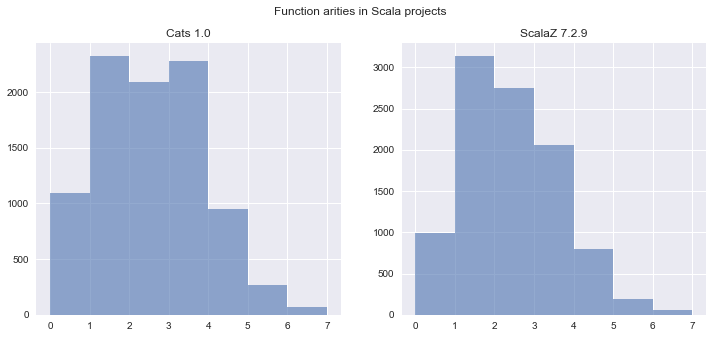

In [6]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle("Function arities in Scala projects")
plt.subplot(121)
plt.title("Cats 1.0")
n, bins, patches = plt.hist(cats, bins=range(8),  alpha=0.6, histtype='bar')
plt.subplot(122)
plt.title("ScalaZ 7.2.9")
n, bins, patches = plt.hist(scalaz, bins=range(8),  alpha=0.6, histtype='bar')

# Conclusions

There are no conclusions. Just a general 'Aha, that's how it is'. I was surprised by the number of zero argument functions.

# Future work

I'd like to gather similar statistics for Haskell projects.

Please, contribute!